In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Matplotlib is building the font cache; this may take a moment.


In [2]:
np.random.seed(42)
n = 150
beta1 = 2
beta2_values = np.linspace(0, 0.16, 9)  # Values of beta2 to test
mse_a1 = []
mse_a2 = []

x = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 1, n)

In [3]:
for beta2 in beta2_values:
    y = beta1 * x + beta2 * x**2 + epsilon
    
    # Reshape x for sklearn
    x_reshape = x.reshape(-1, 1)
    
    # Model a1: simple linear regression (y ~ x)
    model_a1 = LinearRegression().fit(x_reshape, y)
    y_pred_a1 = model_a1.predict(x_reshape)
    mse_a1.append(mean_squared_error(y, y_pred_a1))
    
    # Model a2: quadratic regression (y ~ x + x^2)
    x_quad = np.column_stack((x, x**2))
    model_a2 = LinearRegression().fit(x_quad, y)
    y_pred_a2 = model_a2.predict(x_quad)
    mse_a2.append(mean_squared_error(y, y_pred_a2))


In [7]:
y_pred_a1

array([ 4.63031089e+00,  1.27695503e+01,  9.67982942e+00,  7.79628581e+00,
        1.54339956e+00,  1.54305883e+00,  1.59934871e-01,  1.15753345e+01,
        7.83098758e+00,  9.34190782e+00, -3.69790869e-01,  1.30407133e+01,
        1.10988031e+01,  2.33900235e+00,  1.90794881e+00,  1.93026199e+00,
        3.63725834e+00,  6.75231940e+00,  5.44123271e+00,  3.45343067e+00,
        7.98267470e+00,  1.30996470e+00,  3.46636347e+00,  4.51478169e+00,
        5.78203047e+00,  1.04310974e+01,  2.16008746e+00,  6.60368202e+00,
        7.70808207e+00, -4.39979993e-03,  7.92181777e+00,  1.74830912e+00,
        2.58367021e-01,  1.27437165e+01,  1.29802833e+01,  1.07591308e+01,
        3.64250665e+00,  7.19175984e-01,  9.00514192e+00,  5.55717439e+00,
        1.06338038e+00,  6.33446867e+00, -1.74790327e-01,  1.21848054e+01,
        2.99504244e+00,  8.69844834e+00,  3.74276571e+00,  6.68608927e+00,
        7.06244718e+00,  1.95074443e+00,  1.30361191e+01,  1.02892245e+01,
        1.26111181e+01,  

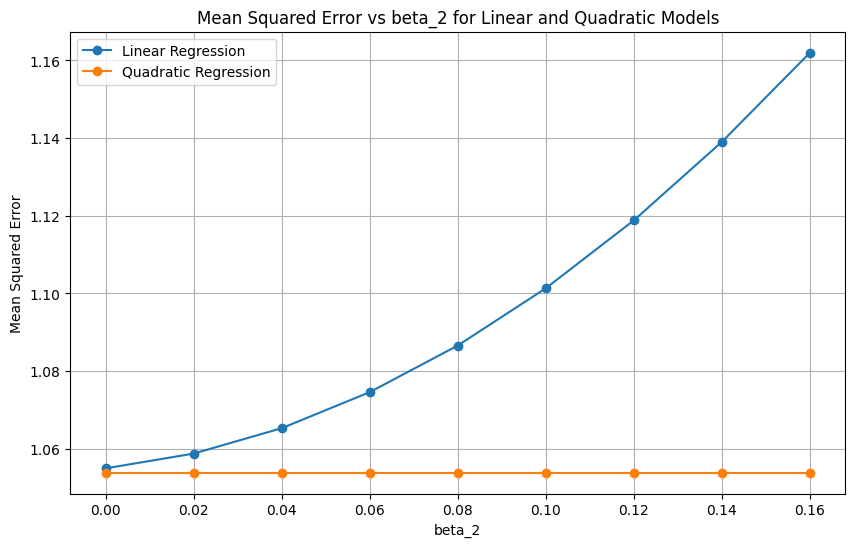

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(beta2_values, mse_a1, label='Linear Regression', marker='o')
plt.plot(beta2_values, mse_a2, label='Quadratic Regression', marker='o')
plt.xlabel(r'beta_2')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs beta_2 for Linear and Quadratic Models')
plt.legend()
plt.grid(True)
plt.show()